In [2]:
import pandas as pd
import datetime as dtt
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('data_usa')

In [4]:
def split(x):
    return x.split(' ',1)[0], x.split(' ',1)[1]

In [5]:
data['date'], data['time'] = zip(*data['created_at'].map(split))

In [6]:
count = data.groupby('date').size()
count_per_day_df = pd.DataFrame(count)

In [7]:
count_per_day_df['date'] = count_per_day_df.index

In [8]:
count_per_day_df['date'] = pd.to_datetime(count_per_day_df['date'])

In [9]:
type(count_per_day_df['date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
count_per_day_df.columns = ['number','date']
count_per_day_df['new_col'] = range(1, len(count_per_day_df) + 1)

In [11]:
count_per_day_df.index = count_per_day_df['new_col']

In [12]:
count_per_day_df

,number,date,new_col
new_col,,,
1,107,2020-03-19,1
2,425,2020-03-20,2
3,448,2020-03-21,3
4,467,2020-03-22,4
5,363,2020-03-23,5
...,...,...,...
363,263,2021-03-16,363
364,299,2021-03-17,364
365,253,2021-03-18,365


In [13]:
count_per_day_df_1 = count_per_day_df.iloc[:183,:]
count_per_day_df_2 = count_per_day_df.iloc[183:, :]

In [45]:
count_per_day_df_2.iloc[183]

number                      37
date       2021-03-20 00:00:00
new_col                    367
Name: 184, dtype: object

In [48]:
count_per_day_df_2.index = np.arange(len(count_per_day_df_2))

In [29]:
#dt = [str(elem) for elem in count_per_day_df['date']]
#dt = [dtt.datetime.strptime(elem, '%Y-%M-%d') for elem in dt]

In [52]:
def date_and_value(dataframe, denominator):
    list_of_means = []
    list_of_dates = []
   
    window = len(dataframe)//denominator
    mean = dataframe['number'].rolling(window=window, center=True, min_periods=2).mean()
    mean_df = mean.iloc[::window]
    list_of_means.append(mean_df)
    dates = dataframe.iloc[mean_df.index.tolist(), :]
    #dt = [str(elem) for elem in dates['date']]
    #dt = [dtt.datetime.strptime(elem, '%Y-%m-%d') for elem in dt]
    #list_of_dates.append(dt)
    return list_of_means, dates['date']

In [53]:
counts_of_tweets_means = date_and_value(count_per_day_df_1,50)
counts_of_tweets_means_1 = date_and_value(count_per_day_df_2,50)

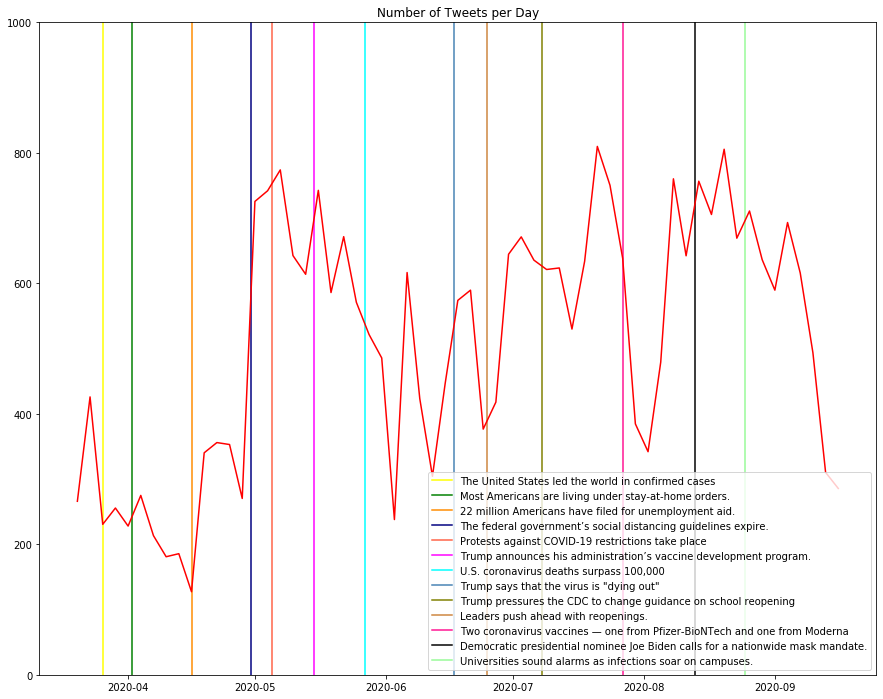

In [22]:
plt.figure(figsize=(15,12))
plt.title("Number of Tweets per Day")
plt.axis("on")
plt.ylim(bottom=0,top=1000)


plt.axvline(dtt.datetime(2020,3,26), 0, 1,label='The United States led the world in confirmed cases', color = 'yellow')
plt.axvline(dtt.datetime(2020,4,2), 0, 1,label='Most Americans are living under stay-at-home orders.', color = 'green')
plt.axvline(dtt.datetime(2020,4,16), 0, 1,label='22 million Americans have filed for unemployment aid.', color = 'darkorange')
plt.axvline(dtt.datetime(2020,4,30), 0, 1,label='The federal government’s social distancing guidelines expire.', color = 'navy')
plt.axvline(dtt.datetime(2020,5,5), 0, 1,label='Protests against COVID-19 restrictions take place', color = 'tomato')
plt.axvline(dtt.datetime(2020,5,15), 0, 1,label='Trump announces his administration’s vaccine development program.', color = 'fuchsia')
plt.axvline(dtt.datetime(2020,5,27), 0, 1,label='U.S. coronavirus deaths surpass 100,000', color = 'cyan')
plt.axvline(dtt.datetime(2020,6,17), 0, 1,label='Trump says that the virus is "dying out"', color = 'steelblue')
plt.axvline(dtt.datetime(2020,7,8), 0, 1,label='Trump pressures the CDC to change guidance on school reopening', color = 'olive')
plt.axvline(dtt.datetime(2020,6,25), 0, 1,label='Leaders push ahead with reopenings.', color = 'peru')
plt.axvline(dtt.datetime(2020,7,27), 0, 1,label='Two coronavirus vaccines — one from Pfizer-BioNTech and one from Moderna', color = 'deeppink')
plt.axvline(dtt.datetime(2020,8,13), 0, 1,label='Democratic presidential nominee Joe Biden calls for a nationwide mask mandate.', color = 'black')
plt.axvline(dtt.datetime(2020,8,25), 0, 1,label='Universities sound alarms as infections soar on campuses.', color = 'palegreen')


plt.plot(counts_of_tweets_means[1],counts_of_tweets_means[0][0],color="red")
plt.legend()
plt.show()

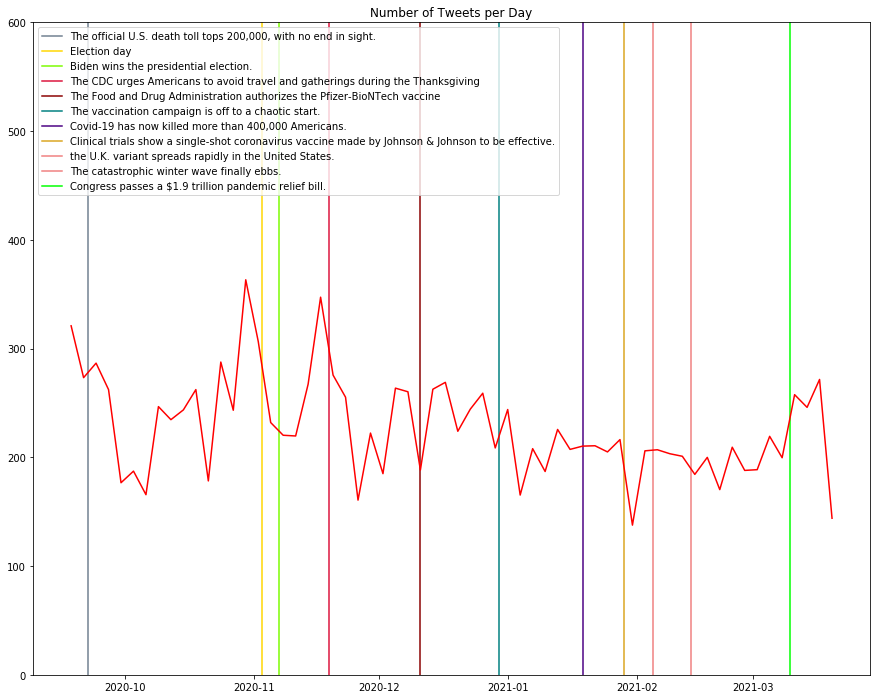

In [57]:
plt.figure(figsize=(15,12))
plt.title("Number of Tweets per Day")
plt.axis("on")
plt.ylim(bottom=0,top=600)

plt.axvline(dtt.datetime(2020,9,22), 0, 1,label='The official U.S. death toll tops 200,000, with no end in sight.', color = 'slategray')
plt.axvline(dtt.datetime(2020,11,3), 0, 1,label='Election day', color = 'gold')
plt.axvline(dtt.datetime(2020,11,7), 0, 1,label='Biden wins the presidential election.', color = 'lawngreen')
plt.axvline(dtt.datetime(2020,11,19), 0, 1,label='The CDC urges Americans to avoid travel and gatherings during the Thanksgiving', color = 'crimson')
plt.axvline(dtt.datetime(2020,12,11), 0, 1,label='The Food and Drug Administration authorizes the Pfizer-BioNTech vaccine', color = 'darkred')
plt.axvline(dtt.datetime(2020,12,30), 0, 1,label='The vaccination campaign is off to a chaotic start.', color = 'teal')
plt.axvline(dtt.datetime(2021,1,19), 0, 1,label='Covid-19 has now killed more than 400,000 Americans.', color = 'indigo')
plt.axvline(dtt.datetime(2021,1,29), 0, 1,label='Clinical trials show a single-shot coronavirus vaccine made by Johnson & Johnson to be effective.', color = 'goldenrod')
plt.axvline(dtt.datetime(2021,2,5), 0, 1,label='the U.K. variant spreads rapidly in the United States.', color = 'lightcoral')
plt.axvline(dtt.datetime(2021,2,14), 0, 1,label='The catastrophic winter wave finally ebbs.', color = 'lightcoral')
plt.axvline(dtt.datetime(2021,3,10), 0, 1,label='Congress passes a $1.9 trillion pandemic relief bill.', color = 'lime')
 
plt.plot(counts_of_tweets_means_1[1],counts_of_tweets_means_1[0][0],color="red")
plt.legend()
plt.show()